'''You will implement DMP in python jupyter notebook. For now, given the following trajectory (z)

import numpy as np
import matplotlib.pyplot as plt
data_length = 500
duration = 10.0
time = np.reshape(np.linspace(0, duration, num = data_length) ,
(data_length,1) )
a = np.cos(time)
b = -0.003*(time**3) -0.005*(time**2) +0.001*time
z = np.sin(0.5*time)+ a + b
plt.plot(z)

- Encode and reproduce the trajectory with 5 and 20 basis functions. (1
plot each)
ps. you can compute the centers and widths of basis functions using:
c    = np.logspace(-3,0,num=BF_number ) # centers of basis functions
h    = BF_number/ (c**2)                # widths of basis functions

- Show DMP generalization capabilities (each, 1 plot)
   - for new initial positions
   - for new final positions
   - with different duration
   - in case the position changes during execution (perturbation)
'''

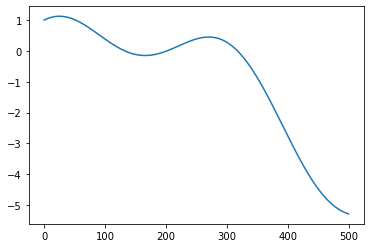

In [1]:
import numpy as np
import matplotlib.pyplot as plt
data_length = 500
duration = 10.0
time = np.reshape(np.linspace(0, duration, num = data_length) ,
(data_length))
a = np.cos(time)
b = -0.003*(time**3) -0.005*(time**2) +0.001*time
z = np.sin(0.5*time)+ a + b
plt.plot(z)
plt.show()

In [2]:
#Delta time interval
dt=duration/data_length

x=z


#Constants
tao=duration
convergenceRate=0.001
alpha=-np.log(convergenceRate)
K=1000
D=2*np.sqrt(K)
g=x[data_length-1] #goal
x0=x[0]            #start position



#Calculate derivatives
#derivativeX=(x[index]-x[index-1])dt
derivativeX=np.diff(x)/dt
v=derivativeX*tao
vDot=np.diff(v)/dt
v=np.append(v,[0])
vDot=np.append(vDot,[0,0])

#Create s
s=np.exp(-alpha/tao*time)

#plt.plot(derivativeX)
#plt.show()
#plt.plot(s)
#plt.show()

#Calculate fTarget
fTarget=(-K*(g-x) + D*v + tao*vDot)/(g-x0)
#fTarget=(-K*(g-x) + D*v + tao*vDot + K*(g-x0))/K

#plt.plot(fTarget)
#plt.show()

In [3]:
def calculateGamaFunction(h,s,c):
    return np.exp(-h*(s-c)**2)

#Constants for gama functions
numberOfGamaFunctions=20
cConsants=np.logspace(-3,0,num=numberOfGamaFunctions)
hConstants=numberOfGamaFunctions/cConsants**2
weights=np.random.random(numberOfGamaFunctions)

#Gama functions with s matrix
Xarray=np.zeros(data_length*numberOfGamaFunctions).reshape(data_length,numberOfGamaFunctions)

for i in range(numberOfGamaFunctions):
    Xarray[:,i]=calculateGamaFunction(hConstants[i],s,cConsants[i])
    
#print(Xarray)

#Calculate y value
summationOfGamas=0
for i in range(numberOfGamaFunctions):
    summationOfGamas+=calculateGamaFunction(hConstants[i],s,cConsants[i])

#Linear regression with normal equation
y=(fTarget*summationOfGamas)/s
#w=(X^T X)^-1 (X^T Y)
weights=(np.linalg.inv((np.transpose(Xarray).dot(Xarray))).dot((np.transpose(Xarray).dot(y))))
print(weights)

[ 18349.14604791  16838.27402089  -5288.50040387 -33038.74054404
 -55050.78489531 -66111.13091561 -66353.81275202 -58868.8354709
 -47527.82753883 -35582.29170481 -25093.69677115 -16954.75479445
 -11209.79911342  -7440.59928031  -5081.90821112  -3618.11811915
  -2668.63502377  -1997.6503303   -1479.00678457  -1044.07442164]


In [4]:
def estimateF(sValue):
    summationOfWeightedGamas=0
    summationOfGamas=0
    for i in range(numberOfGamaFunctions): 
        gamaValue=calculateGamaFunction(hConstants[i],sValue,cConsants[i])
        summationOfWeightedGamas+=weights[i]*gamaValue
        summationOfGamas+=gamaValue
    return summationOfWeightedGamas/summationOfGamas*sValue
  

#Run the model simulation
def runTheSimulation(pertubrationOn=False,pertubrationAmount=0):
    estimationX=np.zeros(data_length)
    estimationX[0]=x0
    _x=x0
    _v=0
    _vDot=0
    for i in range (data_length-1):
        #_vDot=(K*(g-_x)-D*_v-K*(g-x0)*s[i]+K*estimateF(s[i]))/tao
        _vDot=(K*(g-_x)-D*_v+(g-x0)*estimateF(s[i]))/tao
        _v+=_vDot*dt
        _xDot=_v/tao
        _x+=_xDot*dt
        if pertubrationOn and i%100==0:
            _x+=pertubrationAmount
        estimationX[i+1]=_x
    return estimationX

#plt.plot(fTarget)
#plt.plot(estimateF(s))

With 20 gama functions

Original trajectory


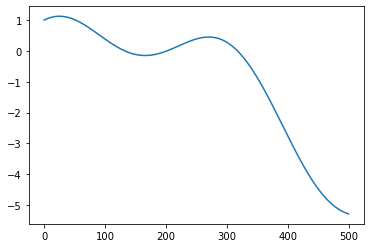

Model trajectory


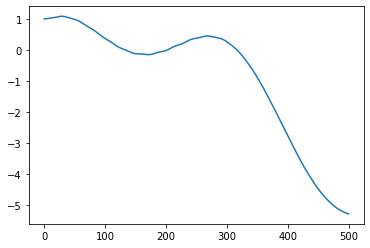

Initial position decrease by 1 Model trajectory


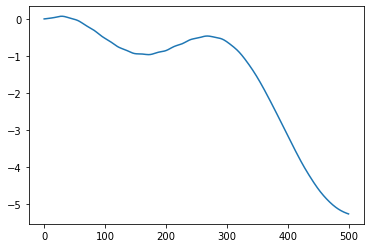

Initial position increase by 1 Model trajectory


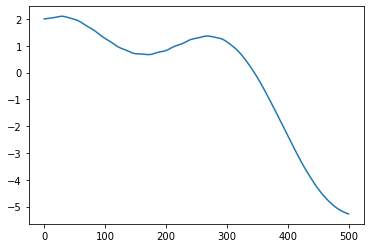

In [5]:
print("With 20 gama functions\n")
print("Original trajectory")
plt.plot(z)
plt.show()

print("Model trajectory")
plt.plot(runTheSimulation())
plt.show()



x0+=-1
print("Initial position decrease by 1 Model trajectory")
plt.plot(runTheSimulation())
plt.show()
x0+=1

x0+=1
print("Initial position increase by 1 Model trajectory")
plt.plot(runTheSimulation())
plt.show()
x0+=-1

Goal decrease by 1 Model trajectory


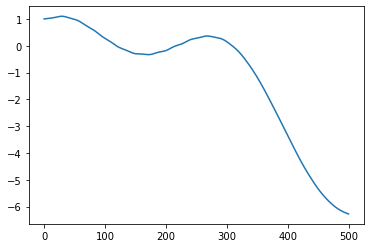

Goal increase by 1 Model trajectory


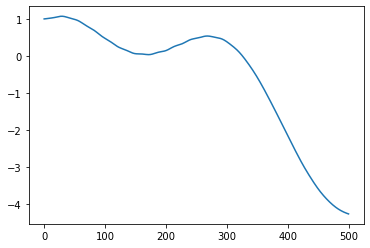

In [6]:
g+=-1
print("Goal decrease by 1 Model trajectory")
plt.plot(runTheSimulation())
plt.show()
g+=1
g+=1
print("Goal increase by 1 Model trajectory")
plt.plot(runTheSimulation())
plt.show()
g+=-1

Duration is multiplied with 3 Model Trajectory



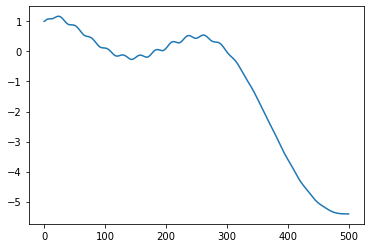

Duration is divided with 3 Model Trajectory



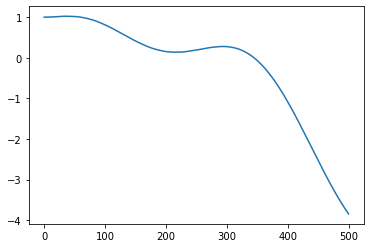

In [7]:
dt*=3
print("Duration is multiplied with 3 Model Trajectory\n")
plt.plot(runTheSimulation())
plt.show()
dt/=3

dt/=3
print("Duration is divided with 3 Model Trajectory\n")
plt.plot(runTheSimulation())
plt.show()
dt*=3

Pertubration affects the model by increasing the x by some value at timesteps multiples of 100

Perturbration By 1 Model trajectory


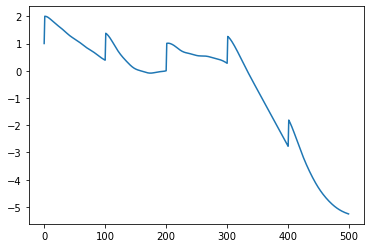

Perturbration By 0.5 Model trajectory


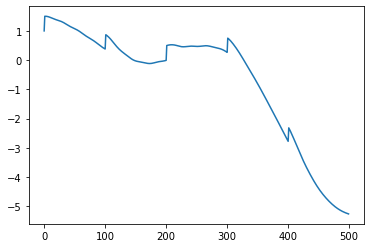

Perturbration By 0.1 Model trajectory


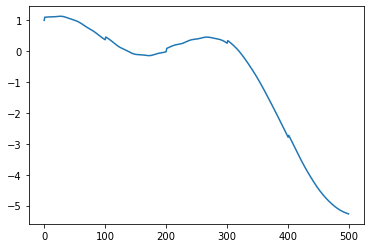

In [8]:

print("Pertubration affects the model by increasing the x by some value at timesteps multiples of 100\n")
print("Perturbration By 1 Model trajectory")
plt.plot(runTheSimulation(True,1))
plt.show()
print("Perturbration By 0.5 Model trajectory")
plt.plot(runTheSimulation(True,0.5))
plt.show()
print("Perturbration By 0.1 Model trajectory")
plt.plot(runTheSimulation(True,0.1))
plt.show()

In [9]:
#Constants for gama functions
numberOfGamaFunctions=5
cConsants=np.logspace(-3,0,num=numberOfGamaFunctions)
hConstants=numberOfGamaFunctions/cConsants**2
weights=np.random.random(numberOfGamaFunctions)

#Gama functions with s matrix
Xarray=np.zeros(data_length*numberOfGamaFunctions).reshape(data_length,numberOfGamaFunctions)

for i in range(numberOfGamaFunctions):
    Xarray[:,i]=calculateGamaFunction(hConstants[i],s,cConsants[i])
    
#print(Xarray)

#Calculate y value
summationOfGamas=0
for i in range(numberOfGamaFunctions):
    summationOfGamas+=calculateGamaFunction(hConstants[i],s,cConsants[i])

#Linear regression with normal equation
y=(fTarget*summationOfGamas)/s
#w=(X^T X)^-1 (X^T Y)
weights=(np.linalg.inv((np.transpose(Xarray).dot(Xarray))).dot((np.transpose(Xarray).dot(y))))
print(weights)

[ 22988.89405897 -61728.11081707 -33731.71800458  -5242.62284027
  -1269.77005429]


With 5 gama functions

Original trajectory


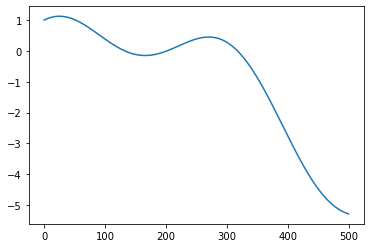

Model trajectory


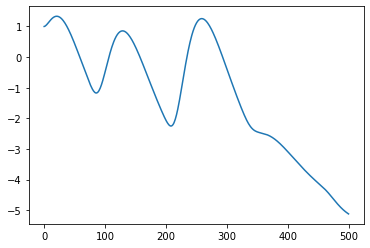

Initial position decrease by 1 Model trajectory


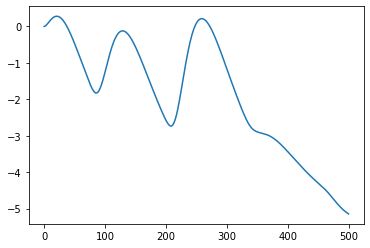

Initial position increase by 1 Model trajectory


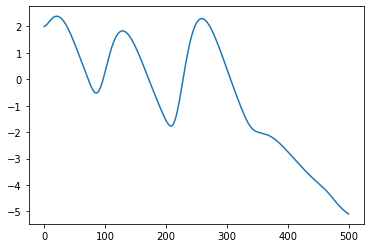

In [10]:
print("With 5 gama functions\n")
print("Original trajectory")
plt.plot(z)
plt.show()

print("Model trajectory")
plt.plot(runTheSimulation())
plt.show()



x0+=-1
print("Initial position decrease by 1 Model trajectory")
plt.plot(runTheSimulation())
plt.show()
x0+=1

x0+=1
print("Initial position increase by 1 Model trajectory")
plt.plot(runTheSimulation())
plt.show()
x0+=-1

Goal decrease by 1 Model trajectory


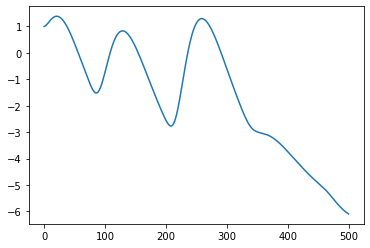

Goal increase by 1 Model trajectory


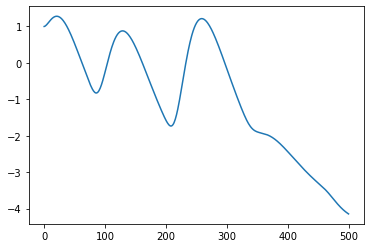

In [11]:
g+=-1
print("Goal decrease by 1 Model trajectory")
plt.plot(runTheSimulation())
plt.show()
g+=1
g+=1
print("Goal increase by 1 Model trajectory")
plt.plot(runTheSimulation())
plt.show()
g+=-1

Duration is multiplied with 3 Model Trajectory



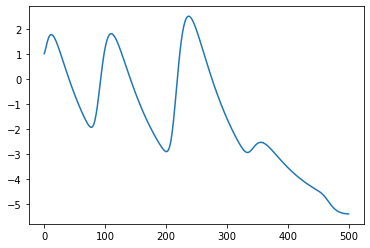

Duration is divided with 3 Model Trajectory



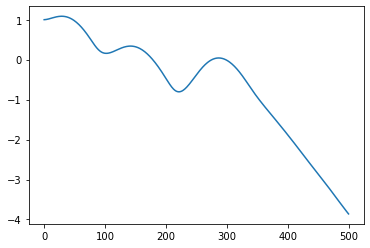

In [12]:
dt*=3
print("Duration is multiplied with 3 Model Trajectory\n")
plt.plot(runTheSimulation())
plt.show()
dt/=3

dt/=3
print("Duration is divided with 3 Model Trajectory\n")
plt.plot(runTheSimulation())
plt.show()
dt*=3

Pertubration affects the model by increasing the x by some value at timesteps multiples of 100

Perturbration By 1 Model trajectory


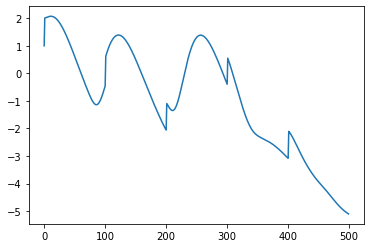

Perturbration By 0.5 Model trajectory


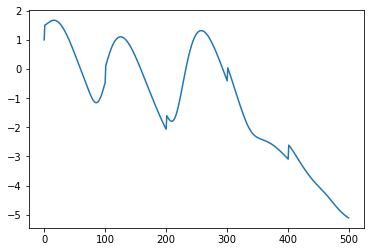

Perturbration By 0.1 Model trajectory


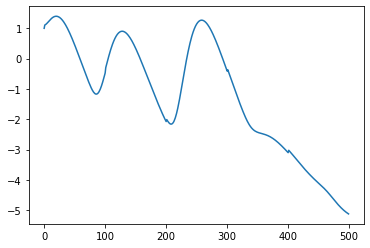

In [13]:
print("Pertubration affects the model by increasing the x by some value at timesteps multiples of 100\n")
print("Perturbration By 1 Model trajectory")
plt.plot(runTheSimulation(True,1))
plt.show()
print("Perturbration By 0.5 Model trajectory")
plt.plot(runTheSimulation(True,0.5))
plt.show()
print("Perturbration By 0.1 Model trajectory")
plt.plot(runTheSimulation(True,0.1))
plt.show()